# Regression Of Leads And Lags Among 10yr  Yield, SPX And DXY
# For the model builiding and to check the correlation and R square 

In [1]:
# Importing Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# To ignore Warning
import warnings
warnings.filterwarnings('ignore')



In [2]:
start_date = "2012-08-01"
end_date = "2023-08-01"

In [3]:
YIELD = yf.download('^TNX', start=start_date, end=end_date, interval='1wk', group_by='ticker')
SPX = yf.download("^SPX", start=start_date, end=end_date, interval='1wk', group_by='ticker')
DXY = yf.download("DX-Y.NYB", start=start_date, end=end_date, interval='1wk', group_by='ticker')
EPS = yf.download('^GSPC', start=start_date, end=end_date, interval='1wk', group_by='ticker')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
df_yield = pd.DataFrame(YIELD)
df_spx =  pd.DataFrame(SPX)
df_dxy =  pd.DataFrame(DXY)
df_eps = pd.DataFrame(EPS)

In [5]:
df_yield.reset_index(inplace=True)
df_dxy.reset_index(inplace=True)
df_spx.reset_index(inplace=True)
df_eps.reset_index(inplace=True)

In [6]:
# Calculate log returns
df_dxy['log_return'] = np.log(df_dxy['Close'] / df_dxy['Close'].shift(1))
df_spx['log_return'] = np.log(df_spx['Close'] / df_spx['Close'].shift(1))

# Calculate covariance between DXY and SPX (normal scenario)
covariance_normal = df_dxy['log_return'].cov(df_spx['log_return'])

# Calculate covariance between DXY and SPX with a 3-week lead for DXY
df_dxy_shifted = df_dxy['log_return'].shift(-3)  # Assuming a 3-week lead
covariance_with_lead = df_dxy_shifted.cov(df_spx['log_return'])

# Calculate correlation coefficients
correlation_normal = df_dxy['log_return'].corr(df_spx['log_return'])
correlation_with_lead = df_dxy_shifted.corr(df_spx['log_return'])

# Calculate R^2 values
r_squared_normal = correlation_normal ** 2
r_squared_with_lead = correlation_with_lead ** 2

# Compare the results
print("Covariance (Normal):", covariance_normal)
print("Covariance (With 3-week Lead):", covariance_with_lead)
print("Correlation (Normal):", correlation_normal)
print("Correlation (With 3-week Lead):", correlation_with_lead)
print("R^2 (Normal):", r_squared_normal)
print("R^2 (With 3-week Lead):", r_squared_with_lead)

Covariance (Normal): -5.569401715940553e-05
Covariance (With 3-week Lead): -1.8098981935966818e-05
Correlation (Normal): -0.2573478048193362
Correlation (With 3-week Lead): -0.08333608415864396
R^2 (Normal): 0.06622789264533117
R^2 (With 3-week Lead): 0.006944902922896589


In [7]:
# Calculate log returns
df_dxy['log_return_dxy'] = np.log(df_dxy['Close'] / df_dxy['Close'].shift(1))
df_spx['log_return_spx'] = np.log(df_spx['Close'] / df_spx['Close'].shift(1))
#df_spx['log_return_spx'] = -df_spx['log_return_spx']
# Shift DXY log returns by 15 trading days
df_dxy_shifted = df_dxy['log_return_dxy'].shift(-3)  # Assuming 15 trading days lead

# Combine shifted DXY and SPX log returns data
combined_data_shifted = pd.concat([df_dxy_shifted, df_spx['log_return_spx']], axis=1).dropna()
combined_data = pd.concat([df_dxy['log_return_dxy'], df_spx['log_return_spx']], axis=1).dropna()


In [8]:
# Perform linear regression on spx,dxy lead by 3 weeks
X1 = combined_data_shifted['log_return_dxy'].values.reshape(-1, 1)
y1 = combined_data_shifted['log_return_spx'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X1, y1)
r_squared = model.score(X1, y1)
correlation_matrix = np.corrcoef(combined_data_shifted['log_return_dxy'], combined_data_shifted['log_return_spx'])
correlation_xy = correlation_matrix[0, 1]

print(r_squared)
print(model.coef_)
print(model.intercept_)

print(correlation_xy)


0.006944902922896401
[[-0.1956989]]
[0.00213578]
-0.08333608415864396


In [9]:
# Perform linear regression spx,dxy no leads and lag
X2 = combined_data['log_return_dxy'].values.reshape(-1, 1)
y2 = combined_data['log_return_spx'].values.reshape(-1, 1)
model1 = LinearRegression()
model1.fit(X2, y2)
r_squared1 = model1.score(X2, y2)
correlation_matrix = np.corrcoef(combined_data['log_return_dxy'], combined_data['log_return_spx'])
correlation_xy = correlation_matrix[0, 1]

print(r_squared1)
print(model.coef_)
print(model.intercept_)

print(correlation_xy)


0.06622789264533124
[[-0.1956989]]
[0.00213578]
-0.2573478048193362


<IPython.core.display.Javascript object>


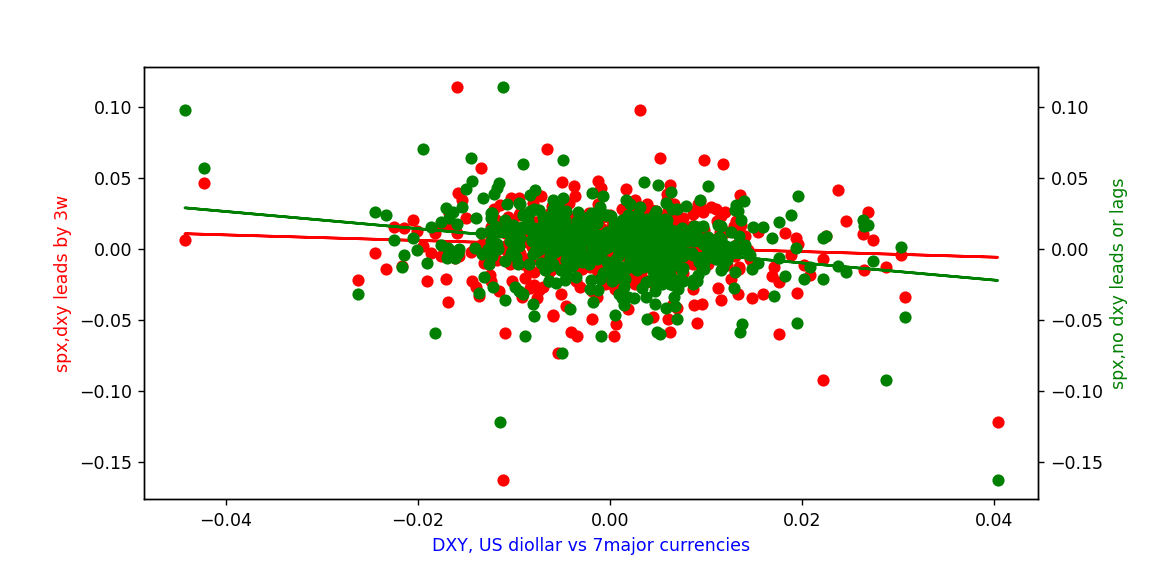

In [10]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2= ax1.twinx()

ax1.scatter(X1, y1,color='r')
ax2.scatter(X2, y2,color='g')
ax1.plot(X1, -0.1956989 * X1 + 0.00213578, 'r')
ax2.plot(X2, -0.60349617 * X2 + 0.00230255, 'g')
ax1.set_ylabel('spx,dxy leads by 3w',color = 'red')
ax2.set_ylabel('spx,no dxy leads or lags',color = 'green')
ax1.set_xlabel('DXY, US diollar vs 7major currencies',color = 'blue')

plt.show()


In [11]:
# Calculate log returns
df_dxy['log_return'] = np.log(df_dxy['Close'] / df_dxy['Close'].shift(1))
df_yield['log_return'] = np.log(df_yield['Close'] / df_yield['Close'].shift(1))

# Calculate covariance between DXY and yield (normal scenario)
covariance_normal = df_dxy['log_return'].cov(df_yield['log_return'])

# Calculate covariance between 10 year yield and DXY with a 4-week lead for DXY
df_dxy_shifted = df_dxy['log_return'].shift(-4)  # Assuming a 4-week lead
covariance_with_lead = df_dxy_shifted.cov(df_yield['log_return'])

# Calculate correlation coefficients
correlation_normal = df_dxy['log_return'].corr(df_yield['log_return'])
correlation_with_lead = df_dxy_shifted.corr(df_yield['log_return'])

# Calculate R^2 values
r_squared_normal = correlation_normal ** 2
r_squared_with_lead = correlation_with_lead ** 2

# Compare the results
print("Covariance (Normal):", covariance_normal)
print("Covariance (With 4-week Lead):", covariance_with_lead)
print("Correlation (Normal):", correlation_normal)
print("Correlation (With 4-week Lead):", correlation_with_lead)
print("R^2 (Normal):", r_squared_normal)
print("R^2 (With 4-week Lead):", r_squared_with_lead)

Covariance (Normal): 0.00010687848482933938
Covariance (With 4-week Lead): 4.038883487417354e-05
Correlation (Normal): 0.1769784903657213
Correlation (With 4-week Lead): 0.06660297517392853
R^2 (Normal): 0.03132138605212971
R^2 (With 4-week Lead): 0.004435956302018941


In [12]:
# Apply a 20 days or 4-weeks lead to the 10-year yield data
df_dxy['log_return_dxy'] = np.log(df_dxy['Close'] / df_dxy['Close'].shift(1))
df_dxy['Shifted_dxy'] = df_dxy['log_return_dxy'].shift(-4)
df_dxy_shifted = df_dxy['Shifted_dxy']

df_dxy['log_return_dxy'] = np.log(df_dxy['Close'] / df_dxy['Close'].shift(1))
df_yield['10yrs_yield'] =np.log(df_yield['Close'] / df_yield['Close'].shift(1)) 

# Combine shifted DXY and SPX log returns data
combined_data2_shifted = pd.concat([df_dxy_shifted, df_yield['10yrs_yield']], axis=1).fillna(0)
combined_data3 = pd.concat([df_dxy['log_return_dxy'], df_yield['10yrs_yield']], axis=1).fillna(0)


In [13]:
# Perform linear regression
X1 = combined_data2_shifted['Shifted_dxy'].values.reshape(-1, 1)
y1 = combined_data2_shifted['10yrs_yield'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X1, y1)
r_squared = model.score(X1, y1)

print(r_squared)
print(model.coef_)
print(model.intercept_)



0.004428137918402242
[[0.4361321]]
[0.00146919]


In [14]:
# Perform linear regression
X2 = combined_data3['log_return_dxy'].values.reshape(-1, 1)
y2 = combined_data3['10yrs_yield'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X2, y2)
r_squared1 = model.score(X2, y2)

print(r_squared1)
print(model.coef_)
print(model.intercept_)


0.031321897798751275
[[1.1581358]]
[0.00120457]


<IPython.core.display.Javascript object>


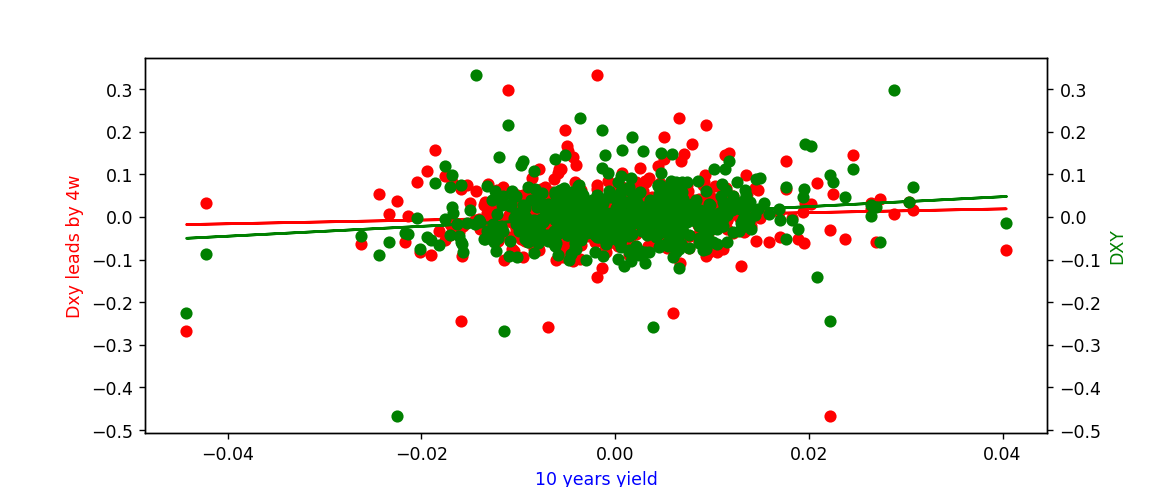

In [15]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2= ax1.twinx()

ax1.scatter(X1, y1, color='r')
ax2.scatter(X2, y2,color='g')
ax1.plot(X1, 0.4361321 * X1 + 0.00146919, 'r')
ax2.plot(X2, 1.1581358 * X2 + 0.00120457, 'g')
ax1.set_ylabel('Dxy leads by 4w',color = 'red')
ax2.set_ylabel('DXY',color = 'green')
ax1.set_xlabel('10 years yield',color = 'blue')

plt.show()


In [22]:
# Calculating covariance, correlation and R square with Log transform 

# Calculate log returns
df_spx['log_return_spx'] = np.log(df_spx['Close'] / df_spx['Close'].shift(1))
df_yield['log_return_yield'] = np.log(df_yield['Close'] / df_yield['Close'].shift(1))

# Calculate covariance between DXY and yield (normal scenario)
covariance_normal = df_spx['log_return_spx'].cov(df_yield['log_return_yield'])

# Calculate covariance between 10 year yield and inverse of spx with a 7-week lead
df_spx['shifted_spx'] = df_spx['log_return_spx'].shift(-7)  # Assuming a 7-week lead
df_spx['spx_Leads_inverted'] =   1/ df_spx['shifted_spx']


covariance_with_lead = df_spx['spx_Leads_inverted'].cov(df_yield['log_return_yield'])

# Calculate correlation coefficients
correlation_normal = df_spx['log_return'].corr(df_yield['log_return'])
correlation_with_lead = df_spx['spx_Leads_inverted'].corr(df_yield['log_return_yield'])

# Calculate R^2 values
r_squared_normal = correlation_normal ** 2
r_squared_with_lead = correlation_with_lead ** 2

# Compare the results
print("Covariance (Normal):", covariance_normal)
print("Covariance (With 7-week Lead):", covariance_with_lead)
print("Correlation (Normal):", correlation_normal)
print("Correlation (With 7-week Lead):", correlation_with_lead)
print("R^2 (Normal):", r_squared_normal)
print("R^2 (With 7-week Lead):", r_squared_with_lead)


Covariance (Normal): 0.00025839653628736324
Covariance (With 7-week Lead): 3.2306297490048417
Correlation (Normal): 0.18245796734202344
Correlation (With 7-week Lead): 0.028409796450617895
R^2 (Normal): 0.03329090984658289
R^2 (With 7-week Lead): 0.0008071165343655412


In [23]:
combined_data4 = pd.concat([df_spx['spx_Leads_inverted'], df_yield['log_return_yield']], axis=1).fillna(0)
combined_data5 = pd.concat([df_spx['log_return_spx'], df_yield['log_return_yield']], axis=1).fillna(0)

In [24]:
combined_data4.columns

Index(['spx_Leads_inverted', 'log_return_yield'], dtype='object')

In [25]:
combined_data5.columns

Index(['log_return_spx', 'log_return_yield'], dtype='object')

In [26]:
# Performed linear regression model calculate the intercept, slope and  R square
X1 = combined_data4['log_return_yield'].values.reshape(-1, 1)
y1 = combined_data4['spx_Leads_inverted'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X1, y1)
r_squared1 = model.score(X1, y1)


print(r_squared1)
print(model.coef_)
print(model.intercept_)


0.0008017692022267431
[[806.41161828]]
[46.55685932]


In [34]:
# Performed linear regression model calculate the intercept, slope and  R square

X2 = combined_data5['log_return_yield'].values.reshape(-1, 1)
y2 = combined_data5['log_return_spx'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X2, y2)
r_squared2 = model.score(X2, y2)

print(r_squared1)
print(model.coef_)
print(model.intercept_)


0.0008017692022267431
[[0.06538687]]
[0.00196397]


<IPython.core.display.Javascript object>


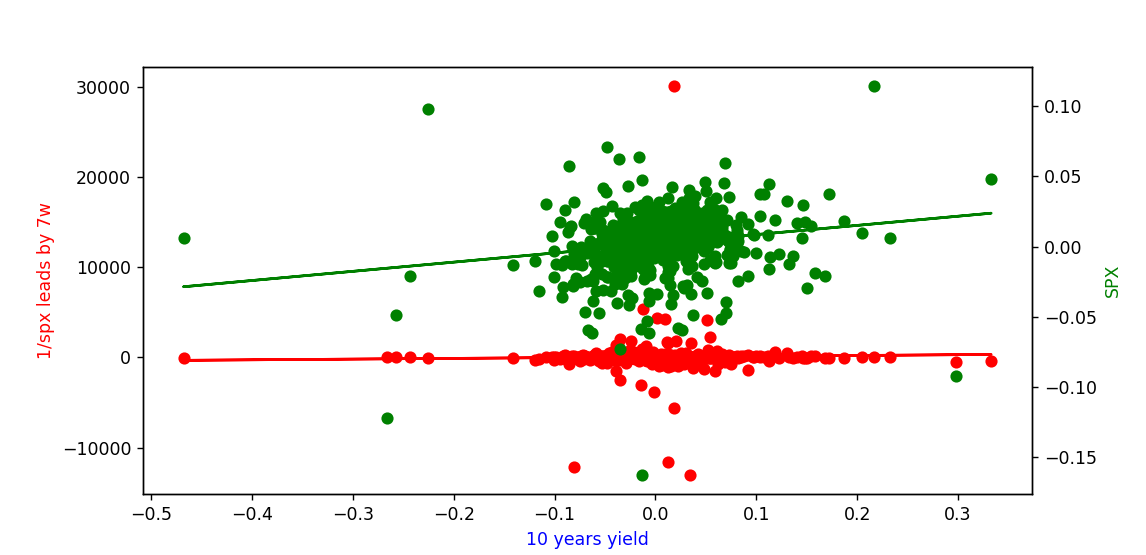

In [35]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2= ax1.twinx()

ax1.scatter(X1, y1, color='r')
ax2.scatter(X2, y2,color='g')
ax1.plot(X1,806.41161828 * X1 + 46.55685932, 'r')
ax2.plot(X2, 0.06538687 * X2 + 0.00196397, 'g')
ax1.set_ylabel('1/spx leads by 7w',color = 'red')
ax2.set_ylabel('SPX',color = 'green')
ax1.set_xlabel('10 years yield',color = 'blue')

plt.show()

In [38]:
#Calculated without using log transform
df_spx['1wlead'] = df_spx['Close'].shift(1)
df_spx["ma"] = df_spx['1wlead'].rolling(window=4).mean()
df_spx['change_rate_spx'] = df_spx['Close'].sub(df_spx["ma"], axis = 0)



df_spx['7shift'] = df_spx['Close'].shift(-7)  
df_spx['change_rate'] = df_spx['Close'].sub(df_spx['7shift'], axis = 0)
df_spx['inverse_spx_7lead'] = 1/df_spx['change_rate']
df_spx['inverse_spx_7lead'] = df_spx['inverse_spx_7lead'].fillna(0)

df_yield['1wlead'] = df_yield['Close'].shift(1)
df_yield["ma"] = df_yield['1wlead'].rolling(window=4).mean()
df_yield['change_rate_yield'] = df_yield['Close'].sub(df_yield["ma"], axis = 0)


covariance_normal = df_spx['change_rate_spx'].cov(df_yield['change_rate_yield'])
covariance_with_lead = df_spx['inverse_spx_7lead'].cov(df_yield['change_rate_yield'])

# Calculate correlation coefficients
correlation_normal = df_spx['change_rate_spx'].corr(df_yield['change_rate_yield'])
correlation_with_lead = df_spx['inverse_spx_7lead'].corr(df_yield['change_rate_yield'])


# Calculate R^2 values
r_squared_normal = correlation_normal ** 2
r_squared_with_lead = correlation_with_lead ** 2

# Compare the results
print("Covariance (Normal):", covariance_normal)
print("Covariance (With 7-week Lead):", covariance_with_lead)
print("Correlation (Normal):", correlation_normal)
print("Correlation (With 7-week Lead):", correlation_with_lead)
print("R^2 (Normal):", r_squared_normal)
print("R^2 (With 7-week Lead):", r_squared_with_lead)


Covariance (Normal): 0.7794044813364875
Covariance (With 7-week Lead): -0.00027526267943839446
Correlation (Normal): 0.05868483380761494
Correlation (With 7-week Lead): -0.006506489411566538
R^2 (Normal): 0.003443909719027385
R^2 (With 7-week Lead): 4.233440446282747e-05
